In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import model
from datetime import datetime
from datetime import timedelta
import requests
import urllib
import lxml
import autoencoder
from bs4 import BeautifulSoup
from bs4 import NavigableString
sns.set()

C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
url="https://finance.yahoo.com/quote/5099.KL/history?p=5099.KL"
request = requests.get(url)
soup = BeautifulSoup(request.text, 'html.parser')
table_big = soup.find('table', attrs={'data-test':'historical-prices'})
soup.find('tfoot').decompose()

In [3]:
print(table_big)

<table class="W(100%) M(0)" data-reactid="31" data-test="historical-prices"><thead data-reactid="32"><tr class="C($c-fuji-grey-j) Fz(xs) Ta(end)" data-reactid="33"><th class="Ta(start) W(100px) Fw(400) Py(6px)" data-reactid="34"><span data-reactid="35">Date</span></th><th class="Fw(400) Py(6px)" data-reactid="36"><span data-reactid="37">Open</span></th><th class="Fw(400) Py(6px)" data-reactid="38"><span data-reactid="39">High</span></th><th class="Fw(400) Py(6px)" data-reactid="40"><span data-reactid="41">Low</span></th><th class="Fw(400) Py(6px)" data-reactid="42"><span data-reactid="43">Close*</span></th><th class="Fw(400) Py(6px)" data-reactid="44"><span data-reactid="45">Adj Close**</span></th><th class="Fw(400) Py(6px)" data-reactid="46"><span data-reactid="47">Volume</span></th></tr></thead><tbody data-reactid="48"><tr class="BdT Bdc($c-fuji-grey-c) Ta(end) Fz(s) Whs(nw)" data-reactid="49"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="50"><span data-reactid="51">Aug 23,

In [4]:
rs = pd.read_html(str(table_big))
rs = rs[0].to_json(orient='records')
print(rs)

[{"Date":"Aug 23, 2018","Open":"3.45","High":"3.50","Low":"3.44","Close*":"3.49","Adj Close**":"3.49","Volume":"6247600"},{"Date":"May 07, 2018","Open":"3.69","High":"3.73","Low":"3.65","Close*":"3.70","Adj Close**":"3.70","Volume":"3620900"},{"Date":"May 04, 2018","Open":"3.73","High":"3.79","Low":"3.71","Close*":"3.71","Adj Close**":"3.71","Volume":"6019100"},{"Date":"May 03, 2018","Open":"3.82","High":"3.82","Low":"3.72","Close*":"3.72","Adj Close**":"3.72","Volume":"11624200"},{"Date":"May 02, 2018","Open":"3.84","High":"3.88","Low":"3.76","Close*":"3.83","Adj Close**":"3.83","Volume":"8070700"},{"Date":"Apr 30, 2018","Open":"4.00","High":"4.05","Low":"3.82","Close*":"3.85","Adj Close**":"3.85","Volume":"8971500"},{"Date":"Apr 27, 2018","Open":"3.78","High":"3.97","Low":"3.74","Close*":"3.97","Adj Close**":"3.97","Volume":"9699300"},{"Date":"Apr 26, 2018","Open":"3.66","High":"3.75","Low":"3.66","Close*":"3.74","Adj Close**":"3.74","Volume":"6005100"},{"Date":"Apr 25, 2018","Open":

In [7]:
df = pd.read_json(rs)
df = df[['Date','Open','High','Low','Close*','Adj Close**']]
df = df.sort_values(by='Date', ascending=1)
date_ori = pd.to_datetime(df.iloc[:, 0]).tolist()
df.head()

,Date,Open,High,Low,Close*,Adj Close**
99,2017-12-14,3.25,3.28,3.23,3.26,3.26
98,2017-12-15,3.26,3.35,3.24,3.35,3.35
97,2017-12-18,3.34,3.39,3.31,3.38,3.38
96,2017-12-19,3.38,3.38,3.30,3.30,3.30
95,2017-12-20,3.31,3.34,3.29,3.33,3.33


In [9]:
df = df[df.Low != '-']
minmax = MinMaxScaler().fit(df.iloc[:, 1:].astype('float32'))
df_log = minmax.transform(df.iloc[:, 1:].astype('float32'))
df_log = pd.DataFrame(df_log)
df_log.head()

,0,1,2,3,4
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.006667,0.047619,0.007812,0.067164,0.067164
2,0.060000,0.074830,0.062500,0.089552,0.089552
3,0.086667,0.068027,0.054687,0.029851,0.029851
4,0.040000,0.040816,0.046875,0.052239,0.052239


In [10]:
thought_vector = autoencoder.reducedimension(df_log.values, 16, 0.001, 128, 100)

epoch: 10 loss: 0.27880472 time: 0.0019981861114501953
epoch: 20 loss: 0.27875528 time: 0.001993894577026367
epoch: 30 loss: 0.27867445 time: 0.0019943714141845703
epoch: 40 loss: 0.27854487 time: 0.001994609832763672
epoch: 50 loss: 0.2783425 time: 0.001995086669921875
epoch: 60 loss: 0.2780339 time: 0.0019943714141845703
epoch: 70 loss: 0.2775685 time: 0.0019943714141845703
epoch: 80 loss: 0.2768636 time: 0.001995086669921875
epoch: 90 loss: 0.27581316 time: 0.001995563507080078
epoch: 100 loss: 0.2743512 time: 0.0009970664978027344


In [11]:
thought_vector.shape

(97, 16)

In [12]:
num_layers = 1
size_layer = 128
timestamp = 7
epoch = 500
dropout_rate = 0.1

In [13]:
tf.reset_default_graph()
modelnn = model.Model(0.001, num_layers, thought_vector.shape[1], size_layer, df_log.shape[1], dropout_rate)
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
for i in range(epoch):
    init_value = np.zeros((1, num_layers * 2 * size_layer))
    total_loss = 0
    for k in range(0, (df_log.shape[0] // timestamp) * timestamp, timestamp):
        batch_x = np.expand_dims(thought_vector[k: k + timestamp, :], axis = 0)
        batch_y = df_log.iloc[k + 1: k + timestamp + 1, :].values
        last_state, _, loss = sess.run([modelnn.last_state, 
                                        modelnn.optimizer, 
                                        modelnn.cost], feed_dict={modelnn.X: batch_x, 
                                                                  modelnn.Y: batch_y, 
                                                                  modelnn.hidden_layer: init_value})
        loss = np.mean(loss)
        init_value = last_state
        total_loss += loss
    total_loss /= (df_log.shape[0] // timestamp)
    if (i + 1) % 100 == 0:
        print('epoch:', i + 1, 'avg loss:', total_loss)

C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


epoch: 100 avg loss: 0.11509644956542896
epoch: 200 avg loss: 0.03539318390763723
epoch: 300 avg loss: 0.026156453487391654
epoch: 400 avg loss: 0.022996252187742636
epoch: 500 avg loss: 0.022595620355927028


In [14]:
output_predict = np.zeros((df_log.shape[0] + 1, df_log.shape[1]))
output_predict[0, :] = df_log.iloc[0, :]
upper_b = (df_log.shape[0] // timestamp) * timestamp
init_value = np.zeros((1, num_layers * 2 * size_layer))
for k in range(0, (df_log.shape[0] // timestamp) * timestamp, timestamp):
    out_logits, last_state = sess.run([modelnn.logits, modelnn.last_state], feed_dict = {modelnn.X:np.expand_dims(thought_vector[k: k + timestamp, :], axis = 0),
                                     modelnn.hidden_layer: init_value})
    init_value = last_state
    output_predict[k + 1: k + timestamp + 1, :] = out_logits
    
out_logits, last_state = sess.run([modelnn.logits, modelnn.last_state], feed_dict = {modelnn.X:np.expand_dims(thought_vector[upper_b: , :], axis = 0),
                                     modelnn.hidden_layer: init_value})
init_value = last_state
output_predict[upper_b + 1: df_log.shape[0] + 1, :] = out_logits
df_log.loc[df_log.shape[0]] = out_logits[-1, :]
date_ori.append(date_ori[-1]+timedelta(days=1))

In [15]:
df_log = minmax.inverse_transform(output_predict)
date_ori=pd.Series(date_ori).dt.strftime(date_format='%Y-%m-%d').tolist()

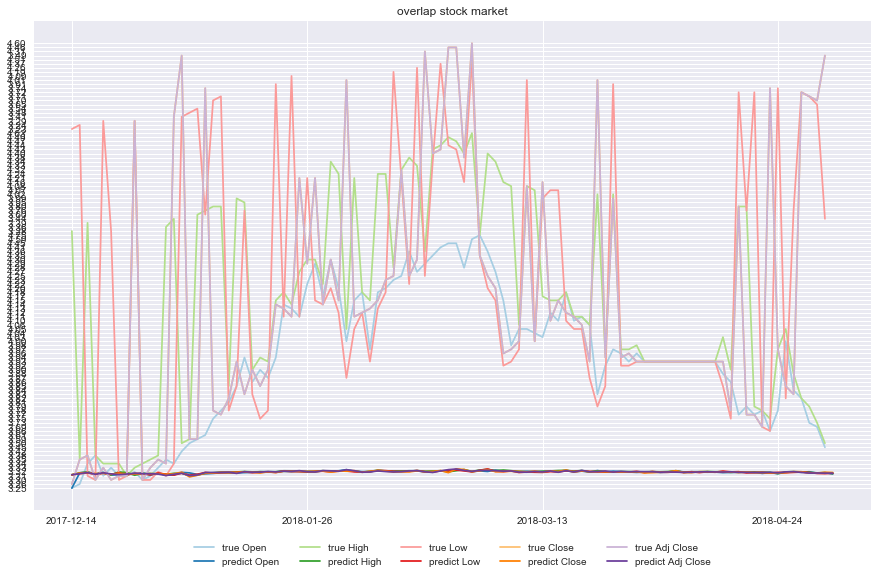

In [16]:
current_palette = sns.color_palette("Paired", 12)
fig = plt.figure(figsize = (15,10))
ax = plt.subplot(111)
x_range_original = np.arange(df.shape[0])
x_range_future = np.arange(df_log.shape[0])
ax.plot(x_range_original, df.iloc[:, 1], label = 'true Open', color = current_palette[0])
ax.plot(x_range_future, df_log[:, 0], label = 'predict Open', color = current_palette[1])
ax.plot(x_range_original, df.iloc[:, 2], label = 'true High', color = current_palette[2])
ax.plot(x_range_future, df_log[:, 1], label = 'predict High', color = current_palette[3])
ax.plot(x_range_original, df.iloc[:, 3], label = 'true Low', color = current_palette[4])
ax.plot(x_range_future, df_log[:, 2], label = 'predict Low', color = current_palette[5])
ax.plot(x_range_original, df.iloc[:, 4], label = 'true Close', color = current_palette[6])
ax.plot(x_range_future, df_log[:, 3], label = 'predict Close', color = current_palette[7])
ax.plot(x_range_original, df.iloc[:, 5], label = 'true Adj Close', color = current_palette[8])
ax.plot(x_range_future, df_log[:, 4], label = 'predict Adj Close', color = current_palette[9])
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(loc = 'upper center', bbox_to_anchor= (0.5, -0.05), fancybox = True, shadow = True, ncol = 5)
plt.title('overlap stock market')
plt.xticks(x_range_future[::30], date_ori[::30])
plt.show()

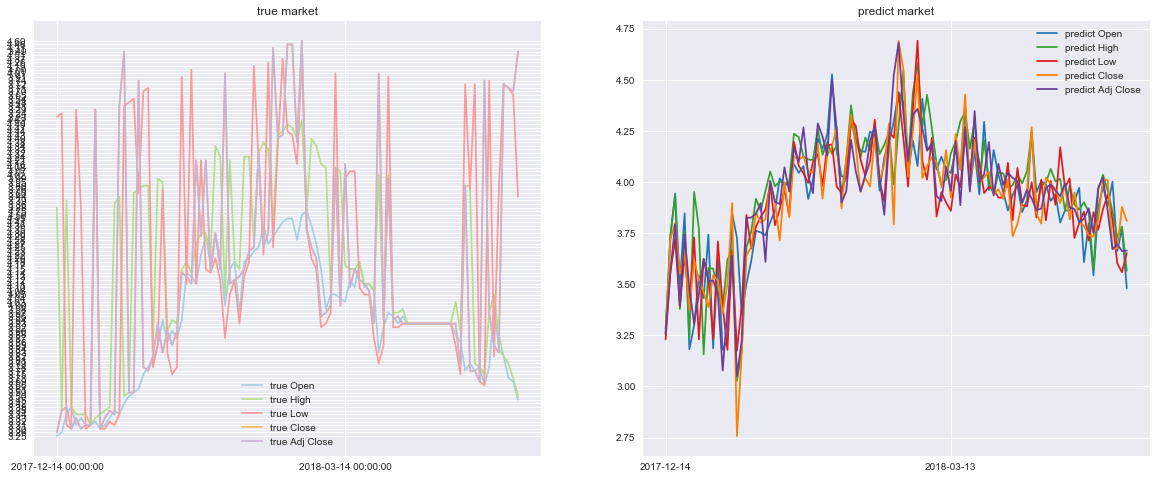

In [17]:
fig = plt.figure(figsize = (20,8))
plt.subplot(1, 2, 1)
plt.plot(x_range_original, df.iloc[:, 1], label = 'true Open', color = current_palette[0])
plt.plot(x_range_original, df.iloc[:, 2], label = 'true High', color = current_palette[2])
plt.plot(x_range_original, df.iloc[:, 3], label = 'true Low', color = current_palette[4])
plt.plot(x_range_original, df.iloc[:, 4], label = 'true Close', color = current_palette[6])
plt.plot(x_range_original, df.iloc[:, 5], label = 'true Adj Close', color = current_palette[8])
plt.xticks(x_range_original[::60], df.iloc[:, 0].tolist()[::60])
plt.legend()
plt.title('true market')
plt.subplot(1, 2, 2)
plt.plot(x_range_future, df_log[:, 0], label = 'predict Open', color = current_palette[1])
plt.plot(x_range_future, df_log[:, 1], label = 'predict High', color = current_palette[3])
plt.plot(x_range_future, df_log[:, 2], label = 'predict Low', color = current_palette[5])
plt.plot(x_range_future, df_log[:, 3], label = 'predict Close', color = current_palette[7])
plt.plot(x_range_future, df_log[:, 4], label = 'predict Adj Close', color = current_palette[9])
plt.xticks(x_range_future[::60], date_ori[::60])
plt.legend()
plt.title('predict market')
plt.show()

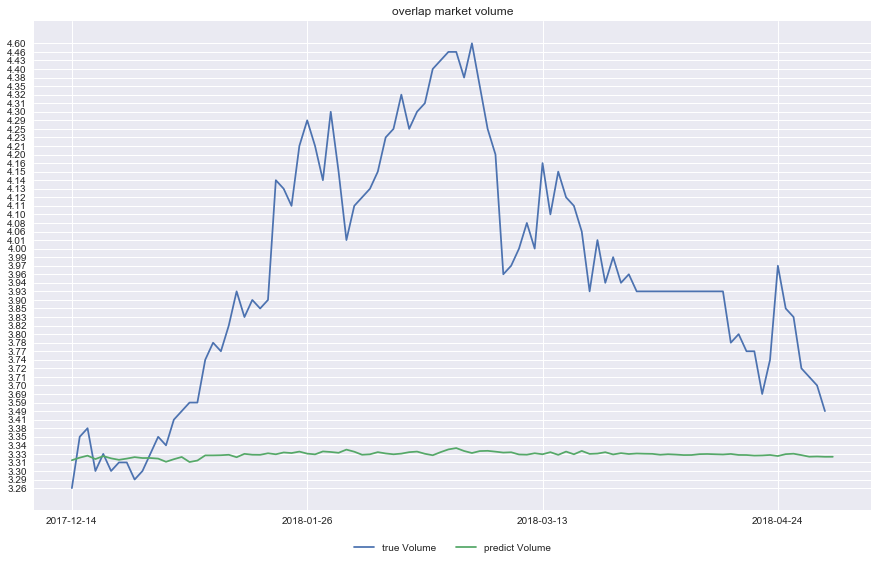

In [18]:
fig = plt.figure(figsize = (15,10))
ax = plt.subplot(111)
ax.plot(x_range_original, df.iloc[:, -1], label = 'true Volume')
ax.plot(x_range_future, df_log[:, -1], label = 'predict Volume')
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(loc = 'upper center', bbox_to_anchor= (0.5, -0.05), fancybox = True, shadow = True, ncol = 5)
plt.xticks(x_range_future[::30], date_ori[::30])
plt.title('overlap market volume')
plt.show()

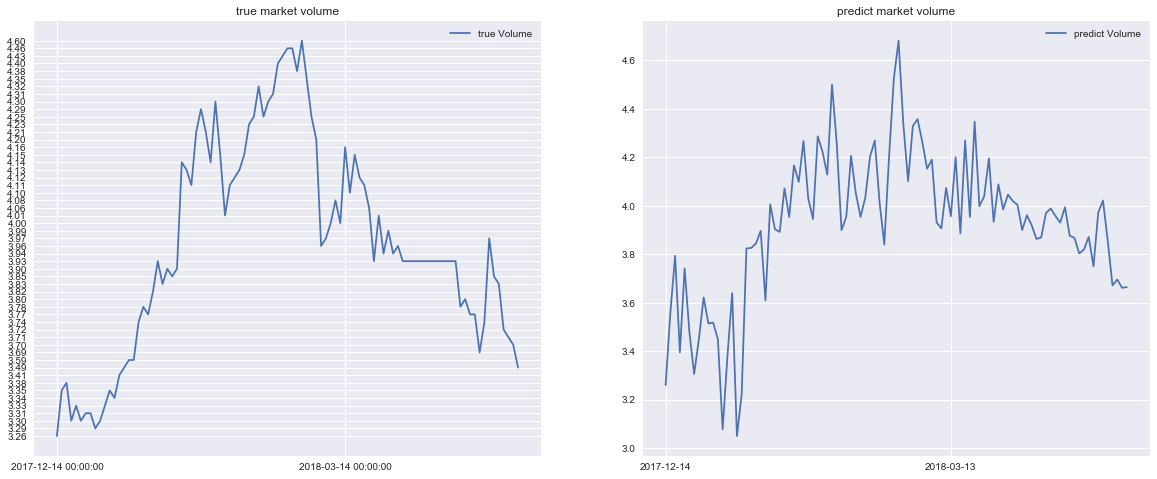

In [19]:
fig = plt.figure(figsize = (20,8))
plt.subplot(1, 2, 1)
plt.plot(x_range_original, df.iloc[:, -1], label = 'true Volume')
plt.xticks(x_range_original[::60], df.iloc[:, 0].tolist()[::60])
plt.legend()
plt.title('true market volume')
plt.subplot(1, 2, 2)
plt.plot(x_range_future, df_log[:, -1], label = 'predict Volume')
plt.xticks(x_range_future[::60], date_ori[::60])
plt.legend()
plt.title('predict market volume')
plt.show()